In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from rdkit.Chem import rdMolDescriptors
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw , Descriptors, AllChem, PandasTools, MACCSkeys, AtomPairs, rdFingerprintGenerator
from rdkit.Chem.rdmolops import  PatternFingerprint
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem.AtomPairs.Pairs import GetAtomPairFingerprintAsBitVect


In [4]:
df = pd.read_csv('/Users/samuelsetsofia/dev/projects/DTI_Crispy/BIOSNAP.csv')
df.head()

,SMILES,Target Sequence,Label
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0


In [5]:
# df['Target Sequence']
df.info()
# df.dropna(inplace=  True)
# df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19234 entries, 0 to 19233
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SMILES           19234 non-null  object
 1   Target Sequence  19234 non-null  object
 2   Label            19234 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 450.9+ KB


In [6]:
PandasTools.AddMoleculeColumnToFrame(df, 'SMILES','mol_obj')
df.head()

[19:01:17] Unusual charge on atom 0 number of radical electrons set to zero
[19:01:17] Unusual charge on atom 0 number of radical electrons set to zero


,SMILES,Target Sequence,Label,mol_obj
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,<rdkit.Chem.rdchem.Mol object at 0x1613638b0>
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,<rdkit.Chem.rdchem.Mol object at 0x161363990>
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,<rdkit.Chem.rdchem.Mol object at 0x161363a00>
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,<rdkit.Chem.rdchem.Mol object at 0x161363a70>
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,<rdkit.Chem.rdchem.Mol object at 0x161363ae0>


In [7]:
# Create an empty list to store MACCS fingerprints
df_maccs = []

# Run a for loop to iterate through each molecule
for mol in df['mol_obj']:
    # Generate bitvector object for MACCS keys
    maccs_bitvector = MACCSkeys.GenMACCSKeys(mol)
    # Create an empty array to store the bit vector as a numpy array
    arr = np.zeros((maccs_bitvector.GetNumBits(),), dtype=np.int8)
    # Convert the RDKit explicit vectors into numpy arrays
    DataStructs.ConvertToNumpyArray(maccs_bitvector, arr)
    # Append the array to the list
    df_maccs.append(arr)

# Convert list of arrays into a DataFrame
maccs_df = pd.DataFrame(df_maccs)

# Label each column with "MACCS_" prefix and unique identifier
maccs_df.columns = [f"MACCS_{i+1}" for i in range(maccs_df.shape[1])]

# Concatenate original DataFrame and the MACCS embeddings DataFrame
MACCS = pd.concat([df, maccs_df], axis=1)

# Select only the MACCS embedding columns for further analysis
MACCS_embeddings = MACCS.drop(MACCS.columns[:4], axis=1)

MACCS_embeddings.head()


,MACCS_1,MACCS_2,MACCS_3,MACCS_4,MACCS_5,MACCS_6,MACCS_7,MACCS_8,MACCS_9,MACCS_10,...,MACCS_158,MACCS_159,MACCS_160,MACCS_161,MACCS_162,MACCS_163,MACCS_164,MACCS_165,MACCS_166,MACCS_167
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0


In [8]:


# Create an empty list to store APF fingerprints
df_apf = []

# Initialize the Atom Pair fingerprint generator with the desired fingerprint size
apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=4096)

# Run a for loop to iterate through each molecule
for mol in df['mol_obj']:
    # Generate the APF bitvector for the molecule
    apf_bitvector = apgen.GetFingerprint(mol)
    # Convert the RDKit bitvector into a numpy array
    arr = np.zeros((4096,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(apf_bitvector, arr)
    # Append the numpy array to the list
    df_apf.append(arr)

# Convert the list of arrays into a DataFrame
apf_df = pd.DataFrame(df_apf)

# Label each column with "APF_" prefix and a unique identifier
apf_df.columns = [f"APF_{i+1}" for i in range(apf_df.shape[1])]

# Concatenate the original DataFrame with the APF embeddings DataFrame
APF = pd.concat([df, apf_df], axis=1)

# Select only the APF embedding columns for further analysis
APF_embedding = APF.drop(APF.columns[:4], axis=1)

# Display the first few rows of the APF embedding DataFrame
APF_embedding.head()


,APF_1,APF_2,APF_3,APF_4,APF_5,APF_6,APF_7,APF_8,APF_9,APF_10,...,APF_4087,APF_4088,APF_4089,APF_4090,APF_4091,APF_4092,APF_4093,APF_4094,APF_4095,APF_4096
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:


# Create an empty list to store TTF fingerprints
df_ttf = []

# Initialize the Topological Torsion fingerprint generator with a specified fingerprint size
ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=2048)

# Run a for loop to iterate through each molecule
for mol in df['mol_obj']:
    # Generate the TTF bitvector for the molecule
    ttf_bitvector = ttgen.GetFingerprint(mol)
    # Convert the RDKit bitvector into a numpy array
    arr = np.zeros((2048,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(ttf_bitvector, arr)
    # Append the numpy array to the list
    df_ttf.append(arr)

# Convert the list of arrays into a DataFrame
ttf_df = pd.DataFrame(df_ttf)

# Label each column with "TTF_" prefix and a unique identifier
ttf_df.columns = [f"TTF_{i+1}" for i in range(ttf_df.shape[1])]

# Concatenate the original DataFrame with the TTF embeddings DataFrame
TTF = pd.concat([df, ttf_df], axis=1)

# Select only the TTF embedding columns for further analysis
TTF_embedding = TTF.drop(TTF.columns[:4], axis=1)

# Display the resulting TTF embedding DataFrame
TTF_embedding.head()


,TTF_1,TTF_2,TTF_3,TTF_4,TTF_5,TTF_6,TTF_7,TTF_8,TTF_9,TTF_10,...,TTF_2039,TTF_2040,TTF_2041,TTF_2042,TTF_2043,TTF_2044,TTF_2045,TTF_2046,TTF_2047,TTF_2048
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:


# Create an empty list to store Pattern Fingerprint (PF) embeddings
df_pf = []

# Run a for loop to iterate through each molecule
for mol in df['mol_obj']:
    # Generate the Pattern Fingerprint bitvector for the molecule
    pf_bitvector = PatternFingerprint(mol)
    # Initialize a numpy array with the appropriate size
    arr = np.zeros((pf_bitvector.GetNumBits(),), dtype=np.int8)
    # Convert the RDKit bitvector into a numpy array
    DataStructs.ConvertToNumpyArray(pf_bitvector, arr)
    # Append the numpy array to the list
    df_pf.append(arr)

# Convert the list of arrays into a DataFrame
pf_df = pd.DataFrame(df_pf)

# Label each column with "PF_" prefix and a unique identifier
pf_df.columns = [f"PF_{i+1}" for i in range(pf_df.shape[1])]

# Concatenate the original DataFrame with the PF embeddings DataFrame
PF = pd.concat([df, pf_df], axis=1)

# Select only the PF embedding columns for further analysis
PF_embeddings = PF.drop(PF.columns[:4], axis=1)

# Display the first few rows of the PF embedding DataFrame
PF_embeddings.head()


,PF_1,PF_2,PF_3,PF_4,PF_5,PF_6,PF_7,PF_8,PF_9,PF_10,...,PF_2039,PF_2040,PF_2041,PF_2042,PF_2043,PF_2044,PF_2045,PF_2046,PF_2047,PF_2048
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,1,0
3,0,1,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0


In [11]:
# Define the amino acid alphabet and one-hot encoding mapping
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
aa_to_int = {aa: i for i, aa in enumerate(amino_acids)}

def one_hot_encode_sequence(seq):
    # Initialize zero matrix for the sequence length x 20 amino acids
    ohe = np.zeros((len(seq), len(amino_acids)), dtype=int)
    for i, aa in enumerate(seq):
        if aa in aa_to_int:
            ohe[i, aa_to_int[aa]] = 1
    return ohe.flatten()  # Flatten the array to make it 1D for each protein

# Apply one-hot encoding to each sequence and store in new column
df['Protein_OHE'] = df['Target Sequence'].apply(one_hot_encode_sequence)
protein_embedding = df['Protein_OHE']

# Display the first few rows of the DataFrame with the new column
# print(df[['Target Sequence', 'Protein_OHE']].head())
protein_embedding.head()

#

0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
Name: Protein_OHE, dtype: object

In [15]:
import pandas as pd

# Example: Protein_OHE column containing lists of one-hot encoded values
# protein_embedding.head() shows the structure provided.

# Expand the 'Protein_OHE' column into a DataFrame with individual columns
protein_ohe_df = pd.DataFrame(
    protein_embedding.tolist(),  # Convert list-like column into a DataFrame
    index=protein_embedding.index  # Maintain the original DataFrame index
)

# Rename columns to prot_ohe_1, prot_ohe_2, ..., prot_ohe_n
protein_ohe_df.columns = [f'prot_ohe_{i+1}' for i in range(protein_ohe_df.shape[1])]

protein_ohe_df.fillna(0, inplace=True)
protein_ohe_df
# Set maximum number of columns to keep
max_length = 1000  # Adjust based on requirement

# Keep only the first `max_length` columns
if protein_ohe_df.shape[1] > max_length:
    protein_ohe_df = protein_ohe_df.iloc[:, :max_length]

# Concatenate the expanded columns back with the original DataFrame (if necessary)
protein_embedding_expanded = pd.concat([protein_embedding, protein_ohe_df], axis=1)

# Drop the original 'Protein_OHE' column, if it's no longer needed
protein_embedding_expanded = protein_embedding_expanded.drop('Protein_OHE', axis=1, errors='ignore')

# Output the resulting DataFrame
print(protein_ohe_df.head())


   prot_ohe_1  prot_ohe_2  prot_ohe_3  prot_ohe_4  prot_ohe_5  prot_ohe_6  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   prot_ohe_7  prot_ohe_8  prot_ohe_9  prot_ohe_10  ...  prot_ohe_991  \
0           0           0           0            0  ...             0   
1           0           0           0            0  ...             0   
2           0           0           0            0  ...             0   
3           0           0           0            0  ...             0   
4           0           0           0            0  ...             0   

   prot_ohe_992  prot_ohe_993  prot_ohe_994  prot_ohe_995  prot_ohe_996  \
0             0        

In [16]:
labels = df['Label']
labels.head()

0    0
1    1
2    0
3    1
4    0
Name: Label, dtype: int64

In [17]:
df_embeddings = pd.concat([ protein_ohe_df,MACCS_embeddings, TTF_embedding, PF_embeddings, APF_embedding, labels], axis=1)
df_embeddings.head()

,prot_ohe_1,prot_ohe_2,prot_ohe_3,prot_ohe_4,prot_ohe_5,prot_ohe_6,prot_ohe_7,prot_ohe_8,prot_ohe_9,prot_ohe_10,...,APF_4088,APF_4089,APF_4090,APF_4091,APF_4092,APF_4093,APF_4094,APF_4095,APF_4096,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Step 1: Separate Features and Labels
features = df_embeddings.drop(columns=["Label"])  # Replace "Label" with the actual label column name
labels = df_embeddings["Label"]

# Step 2: Standardize Features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Step 3: Perform PCA
# Retain components that explain 95% of the variance
pca = PCA(n_components=0.95, svd_solver='auto')  # Adjust n_components to a fixed number if preferred (e.g., 100)

# Fit and transform the standardized data
reduced_features = pca.fit_transform(standardized_features)

# Step 4: Analyze Results
print("Original Features Shape:", features.shape)
print("Reduced Features Shape:", reduced_features.shape)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

# Step 5: Combine Reduced Features with Labels
# Convert the reduced features to a DataFrame
reduced_df = pd.DataFrame(reduced_features)

# Add the 'Label' column back to the reduced dataset (without altering the original names)
reduced_df["Label"] = labels.reset_index(drop=True)

# Step 6: Save Reduced Dataset
reduced_df.to_csv("reduced_embeddings.csv", index=False)


Original Features Shape: (19234, 9359)
Reduced Features Shape: (19234, 2004)
Explained Variance Ratio: [9.77985338e-02 3.76132395e-02 2.22465831e-02 ... 5.87833931e-05
 5.86610861e-05 5.86395173e-05]
Total Variance Explained: 0.950012059716237


In [13]:

# Separate fingerprint types by their column name patterns
maccs_cols = [col for col in df_embeddings.columns if 'MACCS_' in col]
pf_cols = [col for col in df_embeddings.columns if 'PF_' in col]
# mf_cols = [col for col in df_embeddings.columns if 'MF_' in col]
tf_cols = [col for col in df_embeddings.columns if 'TF_' in col]
apf_cols = [col for col in df_embeddings.columns if 'APF_' in col]

# Aggregate each fingerprint into one array per row
df_embeddings['MACCS_FINGERPRINT'] = df_embeddings[maccs_cols].values.tolist()
df_embeddings['PF_FINGERPRINT'] = df_embeddings[pf_cols].values.tolist()
# df_embeddings['MF_FINGERPRINT'] = df_embeddings[mf_cols].values.tolist()
df_embeddings['TF_FINGERPRINT'] = df_embeddings[tf_cols].values.tolist()
df_embeddings['APF_FINGERPRINT'] = df_embeddings[apf_cols].values.tolist()

# Create a new DataFrame with only aggregated fingerprints, Protein_OHE, and Label
df_agg = df_embeddings[['Protein_OHE', 'MACCS_FINGERPRINT', 'PF_FINGERPRINT', 
                         'TF_FINGERPRINT', 'APF_FINGERPRINT', 'Label']]

# Display the structure of the new DataFrame
df_agg.head()


,Protein_OHE,MACCS_FINGERPRINT,PF_FINGERPRINT,TF_FINGERPRINT,APF_FINGERPRINT,Label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


/var/folders/kg/_p0s7sk12zjf3tcq36hs8tpc0000gn/T/ipykernel_15285/426461599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg['MACCS_Mean'] = df_agg['MACCS_FINGERPRINT'].apply(np.mean)
/var/folders/kg/_p0s7sk12zjf3tcq36hs8tpc0000gn/T/ipykernel_15285/426461599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg['PF_Mean'] = df_agg['PF_FINGERPRINT'].apply(np.mean)
/var/folders/kg/_p0s7sk12zjf3tcq36hs8tpc0000gn/T/ipykernel_15285/426461599.py:5: SettingWithCopyWarning: 
A value is trying to be se

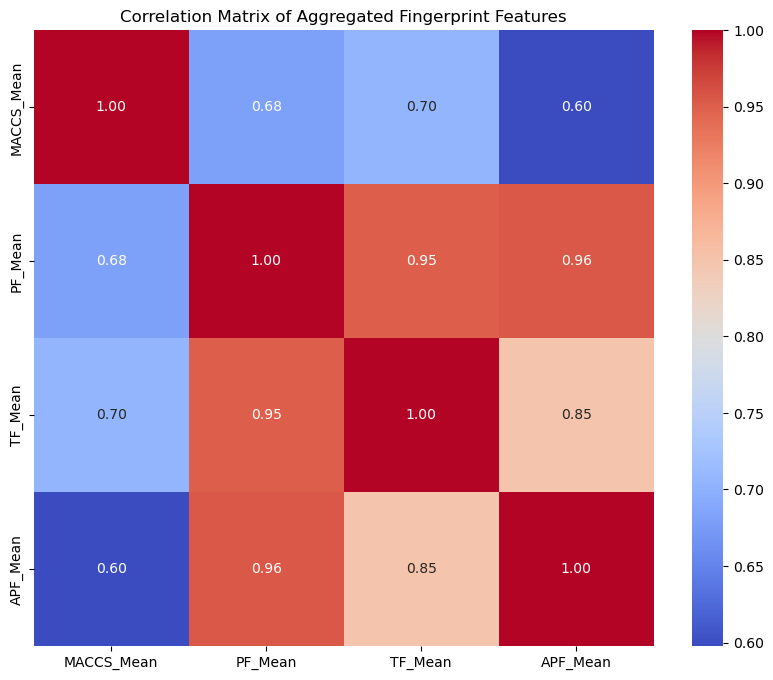

In [14]:


# Calculate the mean of each fingerprint array for correlation analysis
df_agg['MACCS_Mean'] = df_agg['MACCS_FINGERPRINT'].apply(np.mean)
df_agg['PF_Mean'] = df_agg['PF_FINGERPRINT'].apply(np.mean)
# df_agg['MF_Mean'] = df_agg['MF_FINGERPRINT'].apply(np.mean)
df_agg['TF_Mean'] = df_agg['TF_FINGERPRINT'].apply(np.mean)
df_agg['APF_Mean'] = df_agg['APF_FINGERPRINT'].apply(np.mean)

# Calculate the mean for the Protein_OHE if required (assuming it’s a list)
df_agg['Protein_OHE_Mean'] = df_agg['Protein_OHE'].apply(np.mean)

# Select only the mean columns and the Label column for correlation
correlation_df = df_agg[['MACCS_Mean', 'PF_Mean', 'TF_Mean', 'APF_Mean']]

# Compute the correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Aggregated Fingerprint Features')
plt.show()

In [15]:

# Filter out columns that start with APF_ or PF_
columns_to_keep = [col for col in df_embeddings.columns if not (col.startswith('APF_') or col.startswith('PF_'))]
df_embeddings_cleaned = df_embeddings[columns_to_keep]

In [16]:
# df_embeddings_cleaned.head()
# df_embeddings_cleaned.to_csv('df_embeddings_cleaned.csv')
df_embeddings_cleaned.head()

,Protein_OHE,MACCS_1,MACCS_2,MACCS_3,MACCS_4,MACCS_5,MACCS_6,MACCS_7,MACCS_8,MACCS_9,...,TTF_2042,TTF_2043,TTF_2044,TTF_2045,TTF_2046,TTF_2047,TTF_2048,Label,MACCS_FINGERPRINT,TF_FINGERPRINT
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."


In [21]:
# df_embeddings_cleaned = df_embeddings_cleaned.iloc[:, :-1]
# df_embeddings_cleaned.to_csv('df_embeddings_cleaned.csv') 
# df_embeddings_cleaned = df_embeddings_cleaned.iloc[:, :-1]
df_embeddings_cleaned.head()

,Protein_OHE,MACCS_1,MACCS_2,MACCS_3,MACCS_4,MACCS_5,MACCS_6,MACCS_7,MACCS_8,MACCS_9,...,TTF_2040,TTF_2041,TTF_2042,TTF_2043,TTF_2044,TTF_2045,TTF_2046,TTF_2047,TTF_2048,Label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df.head()

,MACCS_1,MACCS_2,MACCS_3,MACCS_4,MACCS_5,MACCS_6,MACCS_7,MACCS_8,MACCS_9,MACCS_10,...,Protein_OHE_991,Protein_OHE_992,Protein_OHE_993,Protein_OHE_994,Protein_OHE_995,Protein_OHE_996,Protein_OHE_997,Protein_OHE_998,Protein_OHE_999,Protein_OHE_1000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

# Load your data (if it is already loaded, you can skip this part)
# df = pd.read_csv("your_data.csv")

# Separate features and target
X = reduced_df.drop(columns=['Label'])  # Adjust if your target column has a different name
y = reduced_df['Label']

# First, split into train and remaining (80% train, 20% remaining)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the remaining 20% into validation and test sets (10% each)
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Combine features and target for each split and save them as CSV files
train_data = X_train.copy()
train_data['Label'] = y_train
train_data.to_csv("train_data.csv", index=False)

valid_data = X_valid.copy()
valid_data['Label'] = y_valid
valid_data.to_csv("valid_data.csv", index=False)

test_data = X_test.copy()
test_data['Label'] = y_test
test_data.to_csv("test_data.csv", index=False)

print("Datasets have been split and saved as train_data.csv, valid_data.csv, and test_data.csv.")


Datasets have been split and saved as train_data.csv, valid_data.csv, and test_data.csv.


In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def load_data(train_path, valid_path, test_path):
    # Load datasets
    train_df = pd.read_csv(train_path)
    valid_df = pd.read_csv(valid_path)
    test_df = pd.read_csv(test_path)
    
    # Separate features and target
    X_train = train_df.drop('Label', axis=1)
    y_train = train_df['Label']
    
    X_valid = valid_df.drop('Label', axis=1)
    y_valid = valid_df['Label']
    
    X_test = test_df.drop('Label', axis=1)
    y_test = test_df['Label']
    
    # Return dictionary containing all splits
    return {
        'X_train': X_train,
        'y_train': y_train,
        'X_valid': X_valid,
        'y_valid': y_valid,
        'X_test': X_test,
        'y_test': y_test
    }

def evaluate_model(model, X, y, model_name, scaler=None):
    # Scale features if scaler is provided
    if scaler is not None:
        X = scaler.transform(X)
    
    # Get predictions
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    # Print evaluation metrics
    print("\n" + "="*50)
    print(f"{model_name} Evaluation")
    print("="*50)
    
    print("\nClassification Report:")
    print(classification_report(y, y_pred))
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y, y_pred))
    
    # Calculate ROC AUC and PR AUC
    roc_auc = roc_auc_score(y, y_pred_proba)
    precision, recall, _ = precision_recall_curve(y, y_pred_proba)
    pr_auc = auc(recall, precision)
    
    print(f"\nROC AUC Score: {roc_auc:.3f}")
    print(f"PR AUC Score: {pr_auc:.3f}")
    
    return {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

def train_and_evaluate_models(data_dict, random_state=42):
    # Extract data
    X_train = data_dict['X_train']
    y_train = data_dict['y_train']
    X_valid = data_dict['X_valid']
    y_valid = data_dict['y_valid']
    X_test = data_dict['X_test']
    y_test = data_dict['y_test']
    
    # Scale features for MLP
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Initialize models
    xgb_model = XGBClassifier(
        learning_rate=0.1,
        n_estimators=200,
        max_depth=6,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=random_state
    )
    
    mlp_model = MLPClassifier(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        batch_size='auto',
        learning_rate='adaptive',
        max_iter=500,
        random_state=random_state
    )
    
    # Train models
    print("Training XGBoost model...")
    xgb_model.fit(X_train, y_train)
   
    print("\nTraining Set Evaluation XGBoost:")
    xgb_train_metrics = evaluate_model(xgb_model, X_train, y_train, "XGBoost")
    
    
    print("\nTraining MLP model...")
    mlp_model.fit(X_train_scaled, y_train)


    print("\nTraining Set Evaluation MLP:")
    mlp_train_metrics = evaluate_model(mlp_model, X_valid, y_valid, "MLP", scaler)

    # Evaluate on validation set
    print("\nValidation Set Evaluation:")
    xgb_valid_metrics = evaluate_model(xgb_model, X_valid, y_valid, "XGBoost")
    mlp_valid_metrics = evaluate_model(mlp_model, X_valid, y_valid, "MLP", scaler)
    
    # Evaluate on test set
    print("\nTest Set Evaluation:")
    xgb_test_metrics = evaluate_model(xgb_model, X_test, y_test, "XGBoost")
    mlp_test_metrics = evaluate_model(mlp_model, X_test, y_test, "MLP", scaler)
    
    return {
        'models': {
            'xgboost': xgb_model,
            'mlp': mlp_model
        },
        'scaler': scaler,
        'metrics': {
            'training': {
                'xgboost': xgb_train_metrics,
                'mlp': mlp_train_metrics
            },
            'validation': {
                'xgboost': xgb_valid_metrics,
                'mlp': mlp_valid_metrics
            },
            'test': {
                'xgboost': xgb_test_metrics,
                'mlp': mlp_test_metrics
            }
        }
    }


train_path = '/Users/samuelsetsofia/dev/projects/DTI_Crispy/train_data.csv'
valid_path = '/Users/samuelsetsofia/dev/projects/DTI_Crispy/valid_data.csv'
test_path = '/Users/samuelsetsofia/dev/projects/DTI_Crispy/test_data.csv'

# Load data
print("Loading data...")
data_dict = load_data(train_path, valid_path, test_path)

# Train and evaluate models
print("Training and evaluating models...")
results = train_and_evaluate_models(data_dict)

# Print final validation and test metrics
print("\nTraining Metrics:")
print(f"XGBoost ROC AUC: {results['metrics']['training']['xgboost']['roc_auc']:.3f}")
print(f"MLP ROC AUC: {results['metrics']['training']['mlp']['roc_auc']:.3f}")

print("\nFinal Validation Metrics:")
print(f"XGBoost ROC AUC: {results['metrics']['validation']['xgboost']['roc_auc']:.3f}")
print(f"MLP ROC AUC: {results['metrics']['validation']['mlp']['roc_auc']:.3f}")

print("\nFinal Test Metrics:")
print(f"XGBoost ROC AUC: {results['metrics']['test']['xgboost']['roc_auc']:.3f}")
print(f"MLP ROC AUC: {results['metrics']['test']['mlp']['roc_auc']:.3f}")

